In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write as writewav
from IPython.display import Audio

In [2]:
soundlen = 5  # Duration of sound (sec), the longer the sound, the more dread
fs = 2 ** 13  # Sampling freq
# fs = 44100

# Dark sound
M = 1000
harmonics = 4
std = 3
base_freq = 60

# Pure A4 note (sine)
# M = 1
# harmonics = 1
# std = 0
# base_freq = 440

means = base_freq * np.arange(1, harmonics + 1)
stds = np.ones(len(means)) * 3# np.array([10, 10, 10, 10])
weights = 1.0 / np.arange(1, harmonics + 1) ** 2.0

In [3]:
def sample_locally_periodic_feat(X, means, stddevs, weights, samples):
    assert samples % len(means) == 0
    freqs = np.random.randn(samples // len(means), len(means)) * stddevs + means
    plt.hist(freqs.flatten(), bins=100)
    phase = np.random.rand(*freqs.shape) * 2 * np.pi
    feat = np.sin(X[:, None, None] * 2*np.pi * freqs) * weights[None, None, :]
    return feat.reshape(-1, M)

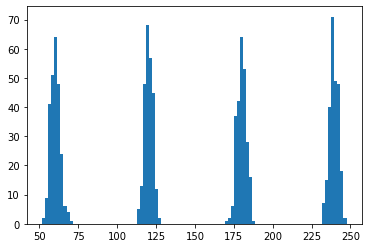

In [4]:
# Sample from a prior 
X = np.linspace(0, soundlen, soundlen * fs)
feat = sample_locally_periodic_feat(X, means, stds, weights, M)
Y = feat @ np.random.randn(M)
Audio(Y, rate=fs)

Text(0.5, 0, 'time (ms)')

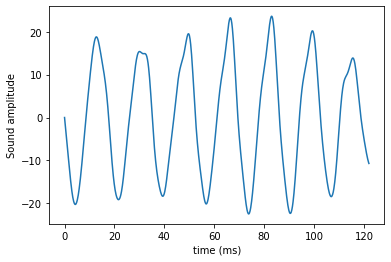

In [5]:
# Exercise: Adapt to plot 100 periods
plt.plot(X[:1000] * 1000, Y[:1000])
plt.ylabel("Sound amplitude")
plt.xlabel("time (ms)")

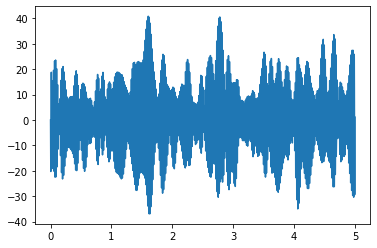

In [6]:
plt.plot(X, Y)

In [7]:
d = np.linspace(-10, 10, 500)
k = np.exp(- (2 * np.sin(np.pi * d / 4.0) ** 2) / (0.3**2)) * np.exp(-d ** 2.0 / (2 * 16.0))

(0.0, 1.0)

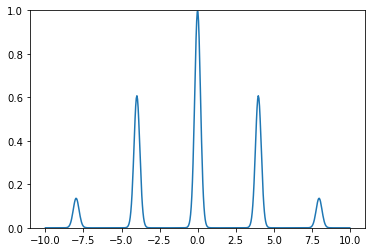

In [8]:
plt.plot(d, k)
plt.ylim([0, 1])

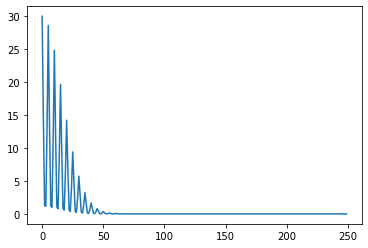

In [9]:
from scipy.fft import fft, fftfreq
yf = fft(k)
plt.plot(np.abs(yf[0:len(k)//2]))

In [10]:
# https://musicinformationretrieval.com/ipython_audio.html